In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.6 MB/s eta 0:00:00


In [ ]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("daffaff/ingredients-food-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.49G/1.49G [00:09<00:00, 176MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/daffaff/ingredients-food-dataset/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/daffaff/ingredients-food-dataset/versions/1"
print("Files in dataset directory:", os.listdir(dataset_path))

dataset_path = "/root/.cache/kagglehub/datasets/daffaff/ingredients-food-dataset/versions/1/Dataset_ingredients"
print("Files in dataset directory:", os.listdir(dataset_path))

dataset_path = "/root/.cache/kagglehub/datasets/daffaff/ingredients-food-dataset/versions/1/Dataset_ingredients/Banana"
print("Files in dataset directory:", os.listdir(dataset_path))

folder_path = "/root/.cache/kagglehub/datasets/daffaff/ingredients-food-dataset/versions/1/Dataset_ingredients"  # Replace with the actual folder path
num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
file_count = sum(len(files) for _, _, files in os.walk(folder_path))
print(f"Total number of files in all subfolders: {file_count}")
# print(f"Number of files in '{folder_path}': {num_files}")

Files in dataset directory: ['Dataset_ingredients']
Files in dataset directory: ['Mung beans', 'Raw Squid', 'green paprika', 'turmeric', 'Bread', 'Noodles', 'Mustard leaf', 'peanuts', 'red onion', 'Wheat Flour', 'salt', 'galangal', 'raw chicken', 'Orange', 'red paprika', 'carrot', 'Soybeans raw', 'raw fish', 'grated coconut', 'green chilli', 'Tempe Mentah', 'ginger', 'Pineapple', 'Red beans', 'Banana', 'tofu', 'Tomato', 'Honey', 'raw cow meat', 'Egg', 'olive oil', 'Gandum', 'cucumber', 'Cheese', 'Shrimp', 'sun kara', 'Milk', 'Yogurt', 'raw goat meat', 'Spaghetti', 'Rice Flour', 'Peanut Butter', 'garlic', 'broccoli', 'Tapioca Flour', 'corn', 'coriander seeds', 'Mango', 'Sweet potato', 'Apple', 'Spinach', 'Eggplant', 'rice', 'pepper powder', 'red chilli', 'cumin seed', 'Sweet Corn', 'potato', 'sugar']
Files in dataset directory: ['Image_9.jpg', 'Image_8.jpg', 'Image_6.jpg', 'Image_23.png', 'Image_12.jpg', 'Image_13.jpg', 'Image_1.png', 'Image_11.jpg', 'Image_18.jpg', 'Image_10.jpg', 'Ima

In [ ]:
import os

# Path to the dataset directory
dataset_path = "/root/.cache/kagglehub/datasets/daffaff/ingredients-food-dataset/versions/1/Dataset_ingredients"

# Iterate through each folder and count the images
for folder in sorted(os.listdir(dataset_path)):  # Sorting for better readability
    folder_path = os.path.join(dataset_path, folder)

    if os.path.isdir(folder_path):  # Ensure it's a directory
        num_images = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"{folder}: {num_images} images")


Apple: 33 images
Banana: 23 images
Bread: 32 images
Cheese: 50 images
Egg: 82 images
Eggplant: 74 images
Gandum: 83 images
Honey: 51 images
Mango: 35 images
Milk: 100 images
Mung beans: 66 images
Mustard leaf: 80 images
Noodles: 115 images
Orange: 73 images
Peanut Butter: 33 images
Pineapple: 87 images
Raw Squid: 58 images
Red beans: 48 images
Rice Flour: 73 images
Shrimp: 40 images
Soybeans raw: 77 images
Spaghetti: 34 images
Spinach: 81 images
Sweet Corn: 89 images
Sweet potato: 58 images
Tapioca Flour: 80 images
Tempe Mentah: 70 images
Tomato: 114 images
Wheat Flour: 73 images
Yogurt: 33 images
broccoli: 69 images
carrot: 61 images
coriander seeds: 73 images
corn: 60 images
cucumber: 74 images
cumin seed: 89 images
galangal: 75 images
garlic: 76 images
ginger: 56 images
grated coconut: 67 images
green chilli: 80 images
green paprika: 59 images
olive oil: 45 images
peanuts: 59 images
pepper powder: 65 images
potato: 55 images
raw chicken: 87 images
raw cow meat: 53 images
raw fish: 5

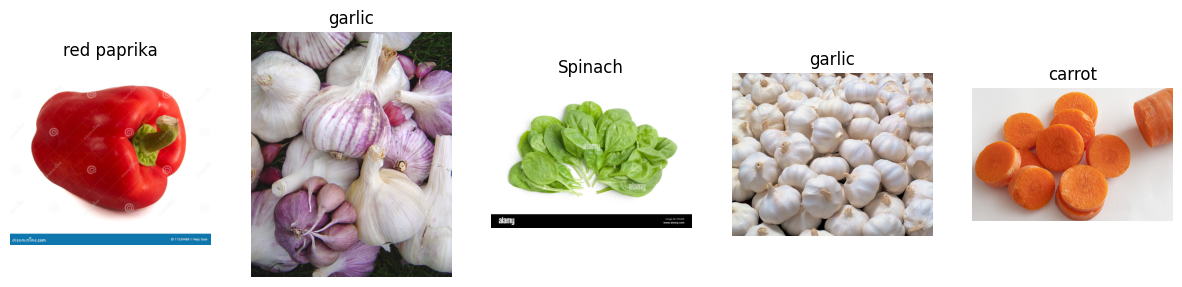

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

def show_sample_images(dataset_path, num_samples=5):
    categories = os.listdir(dataset_path)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        category = random.choice(categories)
        category_path = os.path.join(dataset_path, category)
        image_name = random.choice(os.listdir(category_path))
        image_path = os.path.join(category_path, image_name)

        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

        axes[i].imshow(image)
        axes[i].set_title(category)
        axes[i].axis("off")

    plt.show()

show_sample_images(dataset_path)

# **Data Preprocessing**

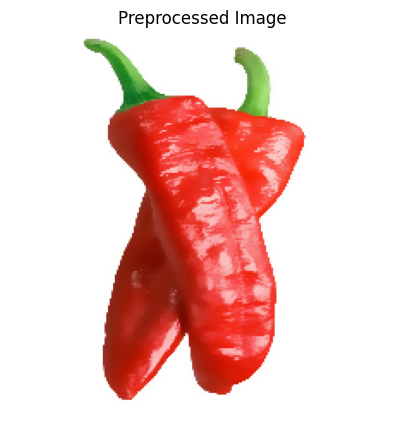

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random

dataset_path = "/root/.cache/kagglehub/datasets/daffaff/ingredients-food-dataset/versions/1/Dataset_ingredients"

# Define preprocessing function
def preprocess_image(image_path, target_size=(224, 224), filter_type="bilateral"):
    """Preprocess an image by resizing, applying noise removal, and normalizing."""
    try:
        image = cv2.imread(image_path)
        if image is None:
            return None  # Skip if image can't be loaded

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Resize image to target size
        image = cv2.resize(image, target_size)

        # Apply noise removal based on selected filter
        if filter_type == "gaussian":
            image = cv2.GaussianBlur(image, (5, 5), 0)
        elif filter_type == "median":
            image = cv2.medianBlur(image, 5)
        elif filter_type == "bilateral":
            image = cv2.bilateralFilter(image, 9, 75, 75)  # Best for preserving edges

        # Normalize pixel values to [0, 1]
        image = image.astype(np.float32) / 255.0

        return image
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Select a random category and a random image within that category.
categories = os.listdir(dataset_path)
sample_category = random.choice(categories)
sample_category_path = os.path.join(dataset_path, sample_category)
image_name = random.choice(os.listdir(sample_category_path))
image_path = os.path.join(sample_category_path, image_name)

# Preprocess the sample image
preprocessed_image = preprocess_image(image_path)

# Check if the image was preprocessed successfully before displaying.
if preprocessed_image is not None:
    # Display results
    plt.figure(figsize=(5, 5))
    plt.imshow(preprocessed_image)
    plt.title("Preprocessed Image")
    plt.axis("off")
    plt.show()
else:
    print(f"Failed to preprocess or load image: {image_path}")

In [ ]:
def remove_noise(image):
    """Apply Gaussian blur for noise removal."""
    return cv2.GaussianBlur(image, (5, 5), 0)

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/daffaff/ingredients-food-dataset/versions/1/Dataset_ingredients"
img_size = (224, 224)
batch_size = 32

# Preprocess images and normalize
def preprocess_image(image):
    # image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, img_size)
    image = remove_noise(image)
    return image / 255.0

# Data generator
datagen = ImageDataGenerator(validation_split=0.2, preprocessing_function=preprocess_image)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

Found 3088 images belonging to 59 classes.
Found 741 images belonging to 59 classes.


# **Training**

In [ ]:
#from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50, Xception
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50, Xception

# Build model using EfficientNetB0 as a feature extractor
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build model using ResNet50 as a feature extractor
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
out = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=out)

# Freeze base model layers
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history=model.fit(train_generator, validation_data=val_generator, epochs=20)

# Evaluate model
val_images, val_labels = next(iter(val_generator))
predictions = model.predict(val_images)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels, axis=1)
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/20
 4/97 ━━━━━━━━━━━━━━━━━━━━ 53s 575ms/step - accuracy: 0.0417 - loss: 4.4998

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


97/97 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.2329 - loss: 3.4125 - val_accuracy: 0.0229 - val_loss: 4.1587
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 87s 895ms/step - accuracy: 0.8174 - loss: 0.8022 - val_accuracy: 0.0175 - val_loss: 4.3707
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 88s 911ms/step - accuracy: 0.9327 - loss: 0.3256 - val_accuracy: 0.0162 - val_loss: 4.4048
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 87s 898ms/step - accuracy: 0.9649 - loss: 0.1600 - val_accuracy: 0.0364 - val_loss: 4.3554
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 89s 917ms/step - accuracy: 0.9811 - loss: 0.0976 - val_accuracy: 0.0472 - val_loss: 4.8597
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 89s 915ms/step - accuracy: 0.9906 - loss: 0.0618 - val_accuracy: 0.1498 - val_loss: 4.1420
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 90s 927ms/step - accuracy: 0.9947 - loss: 0.0361 - val_accuracy: 0.3077 - val_loss: 3.5746
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 88s 909ms/step - accuracy: 0.9871 - loss: 0.0509 - val_accuracy: 0.4413 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Validation Accuracy: 90.62%


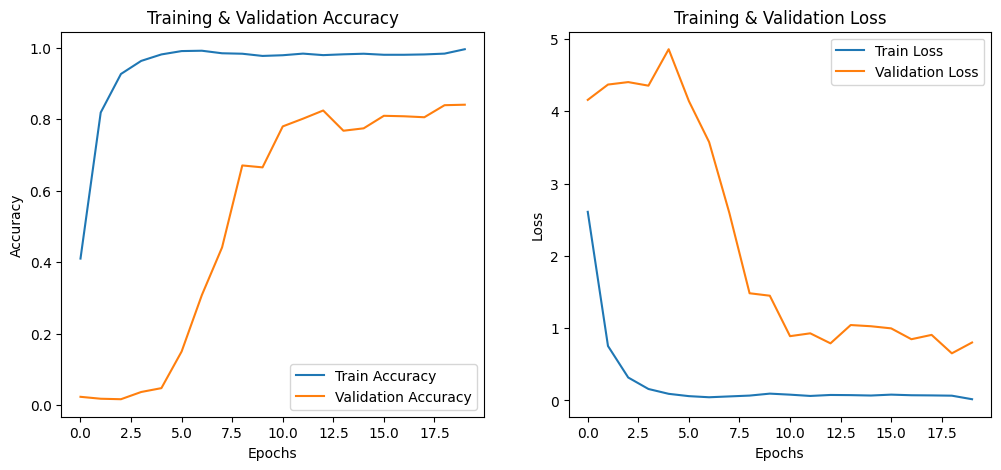

In [ ]:
%matplotlib inline

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

In [ ]:
model.save("/content/drive/MyDrive/250225ResNet50_ingredient_recognition_model.h5")

In [ ]:
model.save("/content/drive/MyDrive/250225ResNet50_ingredient_recognition_model.keras")